# OpenCVで処理して.npyにまとめる

In [20]:
import os
import cv2
import numpy as np
from numpy.lib.format import open_memmap
from matplotlib import pyplot as plt

In [21]:
DATA_SIZE = 9_145
PICT_WIDTH = 224
PICT_HEIGHT = 224
PICT_DIR = './101_ObjectCategories'

In [23]:
data = open_memmap('./data.npy', mode='w+', dtype=np.uint8, shape=(DATA_SIZE, PICT_HEIGHT, PICT_WIDTH, 3))

idx = 0
for label_name in sorted(os.listdir(PICT_DIR)):
    label_dir = f'{PICT_DIR}/{label_name}'
    for file_name in sorted(os.listdir(label_dir)):
        file_path = f'{label_dir}/{file_name}'
        
        # OpenCVで処理する部分
        img = cv2.imread(file_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (PICT_HEIGHT, PICT_WIDTH))
        
        data[idx] = img

        idx += 1

data.flush()

In [4]:
data.shape

(9145, 224, 224, 3)

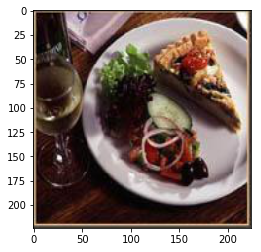

In [5]:
plt.imshow(data[20])
plt.savefig('sample.png')

In [ ]:
# メモリマップドファイルとして読み込む場合
np.load('./data.npy', mmap_mode='r')

# daskでまとめて扱う場合

In [6]:
from skimage.transform import resize
from dask.array.image import imread
from matplotlib import pyplot as plt

In [7]:
PICT_WIDTH = 224
PICT_HEIGHT = 224

In [8]:
imgs = imread('./101_ObjectCategories/*/*',
              preprocess=lambda x: resize(x, output_shape=(PICT_HEIGHT, PICT_WIDTH, 3), mode='reflect')
             )

In [9]:
data = imgs[0:10].compute()
type(data)

numpy.ndarray

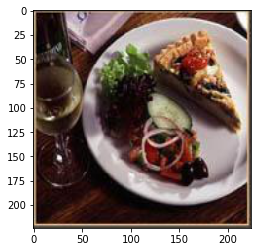

In [10]:
plt.imshow(imgs[20])
plt.savefig('sample2.png')

In [11]:
print(imgs[20].compute().shape)

(224, 224, 3)


In [12]:
imgs[9085:9090].compute()

array([[[[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ..., 
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ..., 
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ..., 
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        ..., 
        [[ 1.        ,  1.        ,

## 失敗例

In [13]:
i = imread('./101_ObjectCategories/*/*')
i.shape

(9145, 144, 145, 3)

In [14]:
i[20].compute().shape

(162, 180, 3)

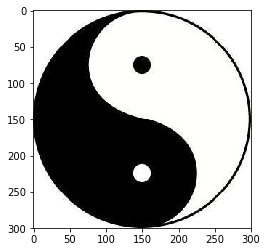

In [15]:
plt.imshow(i[9085].compute())

In [16]:
i[9000].compute().shape

(300, 203, 3)

In [17]:
i = imread('./101_ObjectCategories/*/*',
           preprocess=lambda x: resize(x, output_shape=(PICT_HEIGHT, PICT_WIDTH), mode='reflect')
          )
i.shape

(9145, 224, 224, 3)

In [18]:
print(i[20].compute().shape)

(224, 224, 3)


In [19]:
i[0: 10].compute().shape

ValueError: could not broadcast input array from shape (1,1,224,224) into shape (1,224,224,3)

In [24]:
i.shape

(9145, 224, 224, 3)